# Avacado Project

Submitted by: Sindhu Shree N
    
Batch Number: 1832

Description: Avacado is the fruit mostly found in United States. We are learning the features using machine learning and using some classification and regression algorithms.

Task: We need to apply regression and classification both the methods to predict AveragePrice and Region respectively.

Here first I will apply the Regression models to predict AveragePrice and later I will use classification algorithms to predict region.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve
import pickle
import warnings
warnings.filterwarnings("ignore")

# Examining the data:

In [2]:
df=pd.read_csv("avacado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11663,41,2015-03-15,1.81,3409.93,1321.89,2068.04,0.0,20.00,20.00,0.00,0.00,organic,2015,StLouis
17649,0,2018-03-25,1.74,38441.23,27.25,2031.54,0.0,36382.44,29466.95,6915.49,0.00,organic,2018,Boston
10883,41,2015-03-15,1.56,9530.76,7209.12,1255.07,0.0,1066.57,1056.67,9.90,0.00,organic,2015,PhoenixTucson
9739,41,2015-03-15,1.34,11922.76,7889.79,659.64,0.0,3373.33,3373.33,0.00,0.00,organic,2015,DallasFtWorth
8688,6,2018-02-11,1.48,352731.83,14675.90,270215.97,208.1,67631.86,65856.28,744.47,1031.11,conventional,2018,HartfordSpringfield


We can see that the above dataframe consists of many columns and most of the columns are off numeric type.

# Exploratory data analysis:

In [5]:
df.shape

(18249, 14)

The dataset consists 18248 rows and 14 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Out of 14 columns 2 are integer type data, 9 are float type data and 3 are object type data.

In [8]:
#display features name
df.keys()

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Keeping AveragePrice as the target column and remaining all as input features.

In [6]:
#checking null values
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We are not finding any True values here let us cross check it.

In [3]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Thus the dataset doesnot contains null values.

In [7]:
#summary statistics
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


All columns have a count of 18249 which is a total number of rows in the dataset which means there is no null values.

The describe method gives us the statistical features like mean,median,standard deviation and count.

We can observe that unnamed:0 is just a index number so we can remove it.

In [8]:
#dropping the column unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
The column is dropped from our 

In [7]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We can observe that the date is object type so let us convert it into date type.

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [11]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


So our date is converted into date datatype.

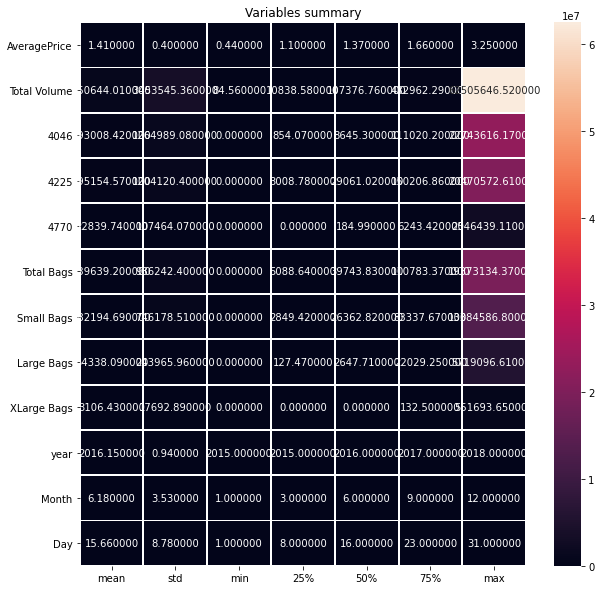

In [13]:
figure=plt.figure(figsize=(11,10))
figure.set_size_inches(10,10)
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,fmt="f",annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variables summary")
plt.show()

<AxesSubplot:>

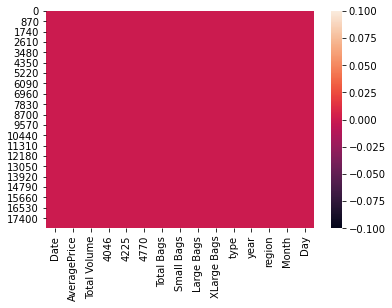

In [187]:
sns.heatmap(df.isnull())

# Univariate Analysis:

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

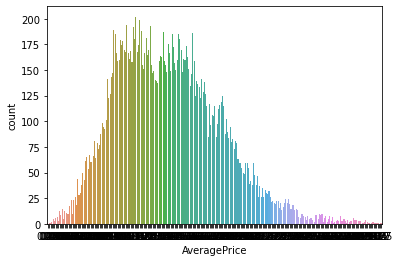

In [20]:
sns.countplot(df['AveragePrice'])

<AxesSubplot:xlabel='type', ylabel='count'>

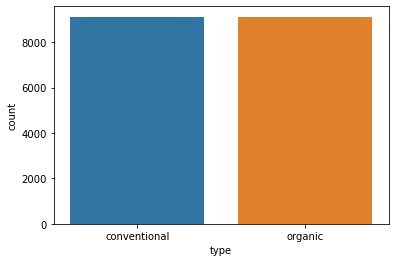

In [33]:
sns.countplot(df['type'])

<AxesSubplot:ylabel='None'>

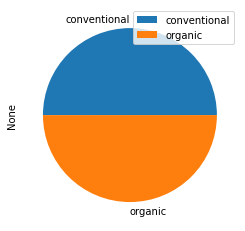

In [24]:
df.groupby('type').size().plot(kind='pie',legend=True)

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

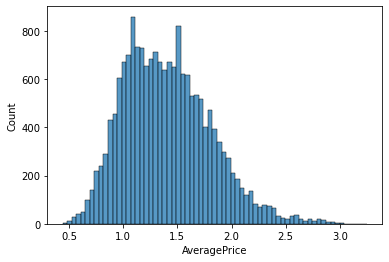

In [53]:
sns.histplot(df['AveragePrice'])

<AxesSubplot:xlabel='type', ylabel='Count'>

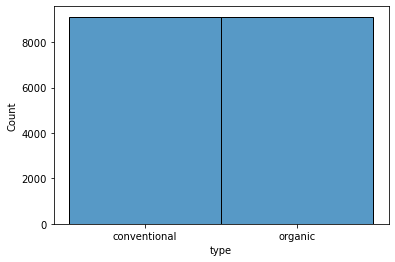

In [56]:
sns.histplot(df['type'])

<AxesSubplot:xlabel='year', ylabel='Count'>

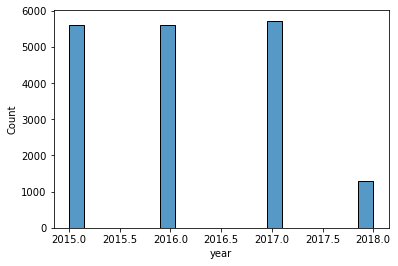

In [57]:
sns.histplot(df['year'])

<AxesSubplot:xlabel='region', ylabel='Count'>

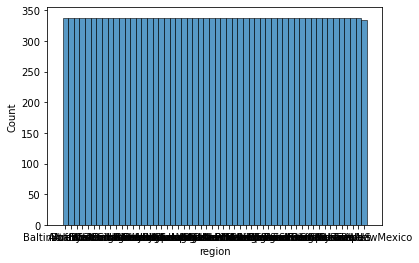

In [58]:
sns.histplot(df['region'])

<AxesSubplot:xlabel='Month', ylabel='Count'>

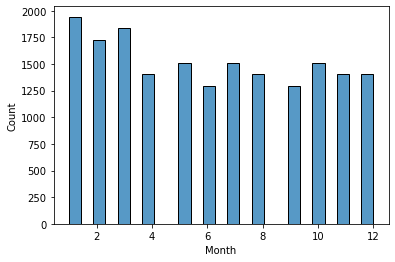

In [59]:
sns.histplot(df['Month'])

<AxesSubplot:xlabel='Day', ylabel='Count'>

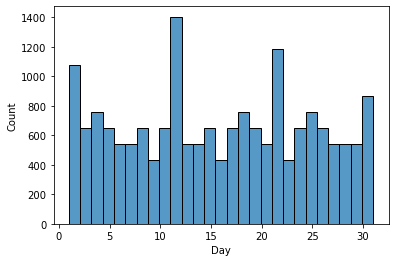

In [60]:
sns.histplot(df['Day'])

In [22]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

Thus we have only 2 unique values in type column that is conventional and organic.

In [23]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

There are many unique values in this region column which tells that in most of the people in these cities consumes this in a high range.

let us check which type of fruit is consumed most whether conventional or organic.

# Bivariate Analysis:

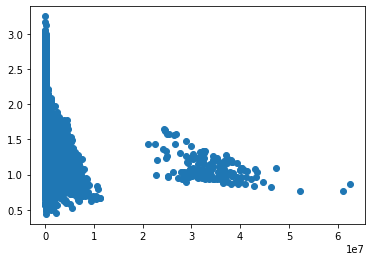

In [27]:
plt.scatter(df['Total Volume'],df['AveragePrice'])

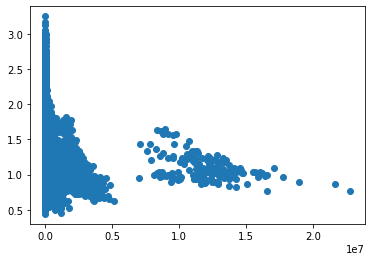

In [28]:
plt.scatter(df['4046'],df['AveragePrice'])

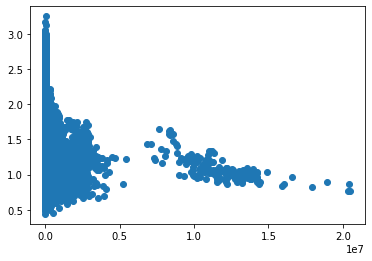

In [29]:
plt.scatter(df['4225'],df['AveragePrice'])

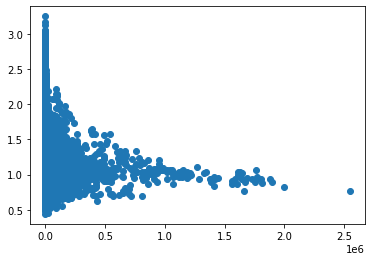

In [30]:
plt.scatter(df['4770'],df['AveragePrice'])

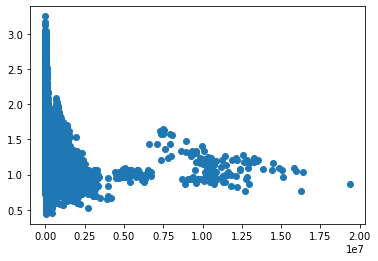

In [32]:
plt.scatter(df['Total Bags'],df['AveragePrice'])

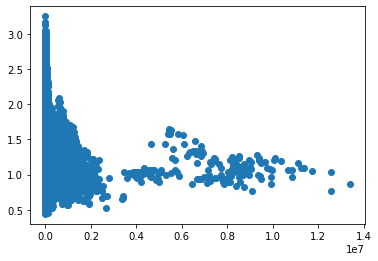

In [33]:
plt.scatter(df['Small Bags'],df['AveragePrice'])

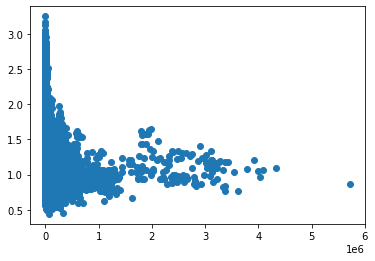

In [34]:
plt.scatter(df['Large Bags'],df['AveragePrice'])

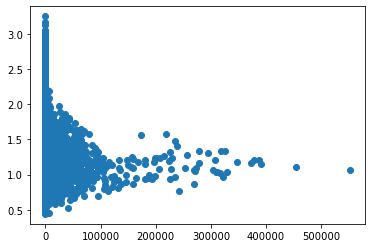

In [35]:
plt.scatter(df['XLarge Bags'],df['AveragePrice'])

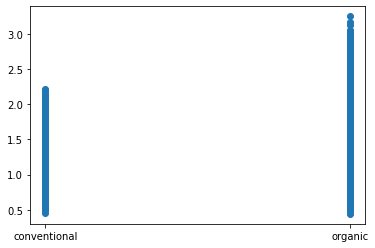

In [36]:
plt.scatter(df['type'],df['AveragePrice'])

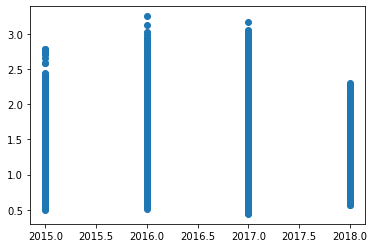

In [37]:
plt.scatter(df['year'],df['AveragePrice'])

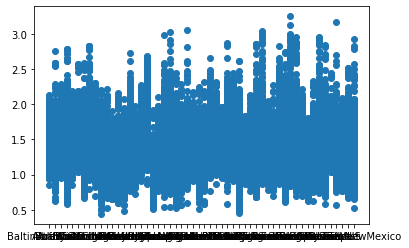

In [38]:
plt.scatter(df['region'],df['AveragePrice'])

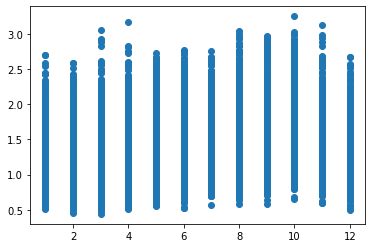

In [39]:
plt.scatter(df['Month'],df['AveragePrice'])

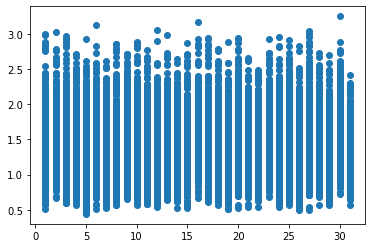

In [40]:
plt.scatter(df['Day'],df['AveragePrice'])

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

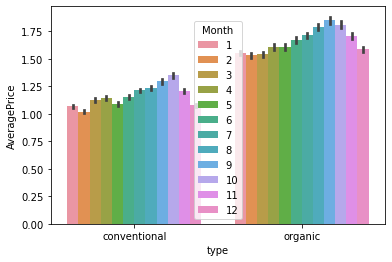

In [41]:
sns.barplot(x='type',y='AveragePrice',hue='Month',data=df)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

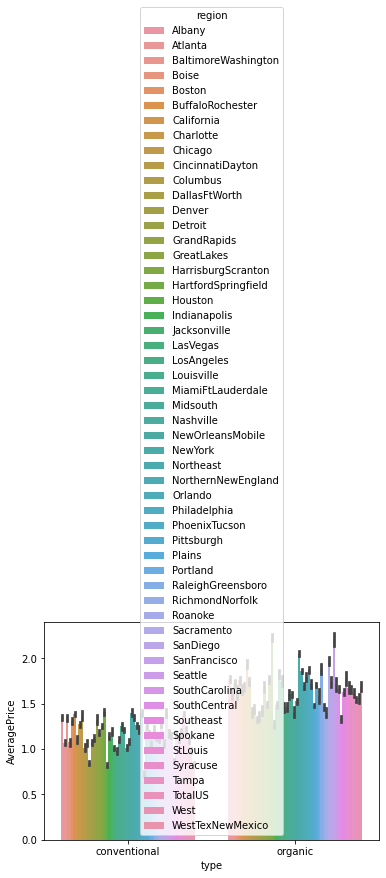

In [43]:
sns.barplot(x='type',y='AveragePrice',hue='region',data=df)

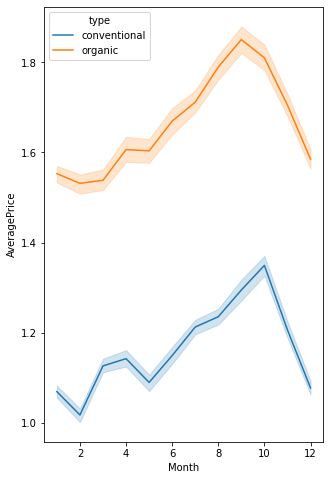

In [45]:
plt.figure(figsize=(5,8))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)
plt.show()

There was a hike between months 8 and 10 for boyh conventional and organic type of Avacados prices.

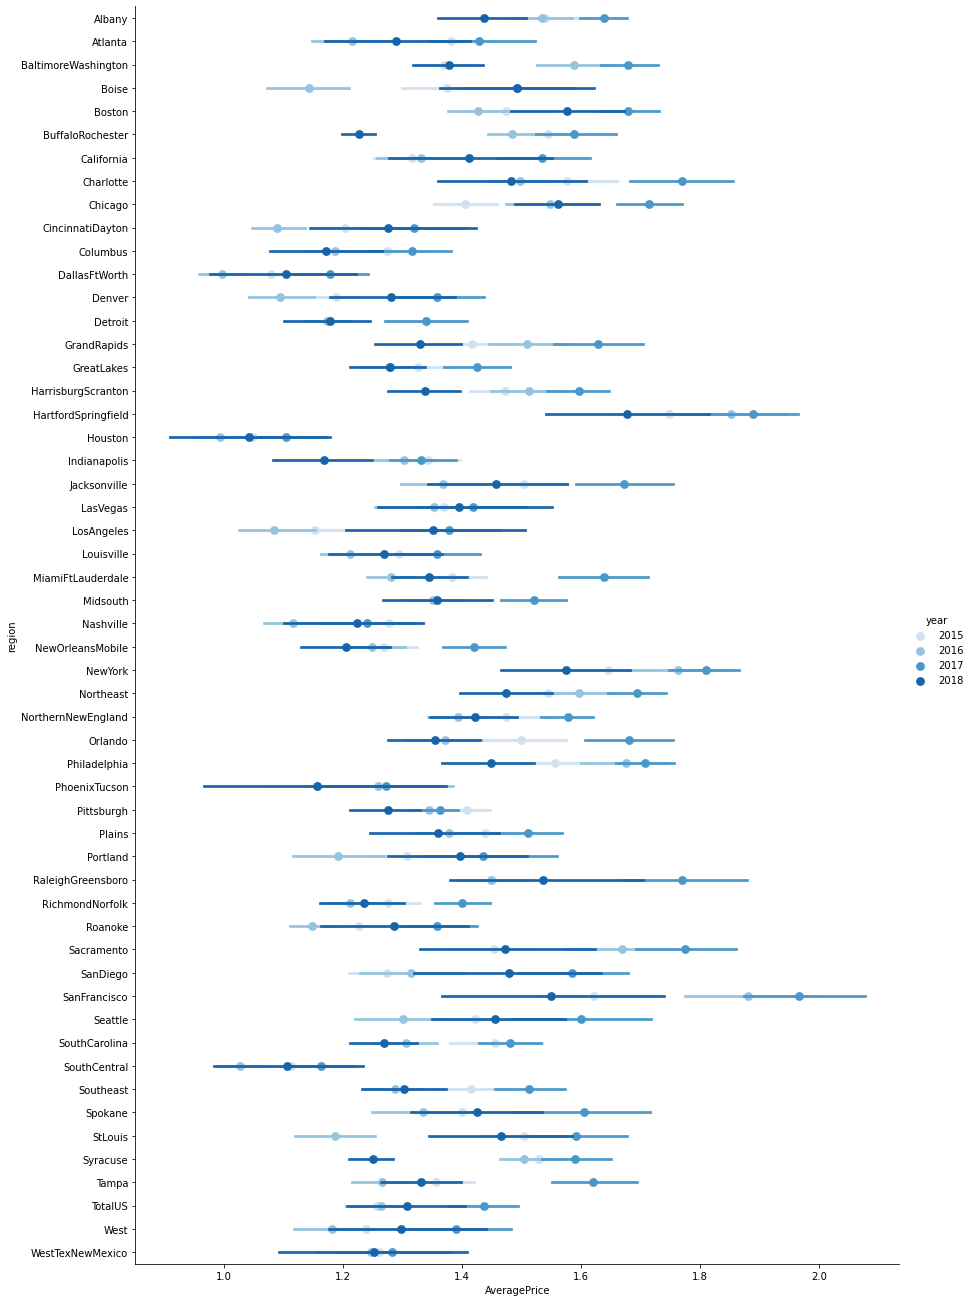

In [51]:
sns.factorplot('AveragePrice','region',data=df,hue='year',size=18,aspect=0.7,palette='Blues',join=False)

We can see that there is a huge increase of average price in SanFrancisco region in the year 2017.

# Normal Distribution Curve:

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

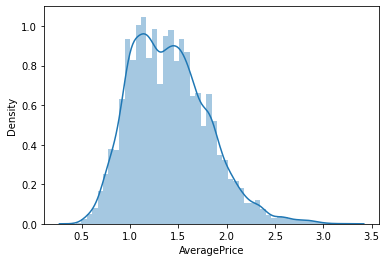

In [62]:
sns.distplot(df['AveragePrice'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

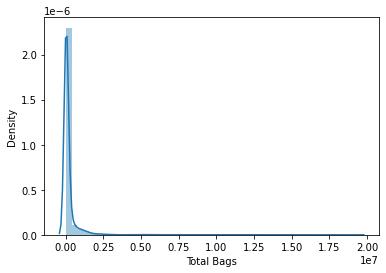

In [63]:
sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

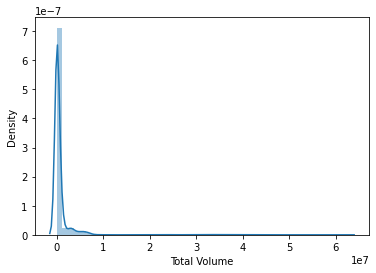

In [64]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

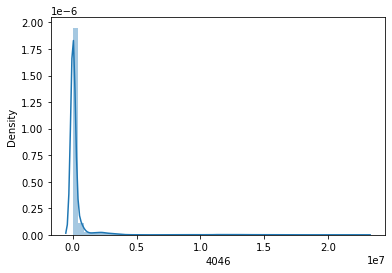

In [65]:
sns.distplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

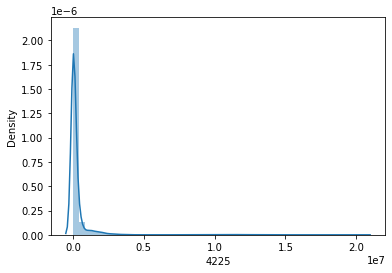

In [66]:
sns.distplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

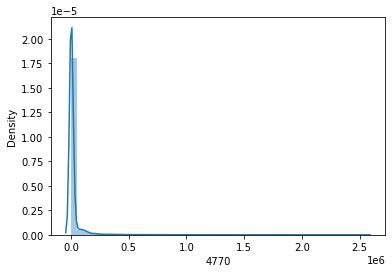

In [67]:
sns.distplot(df['4770'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

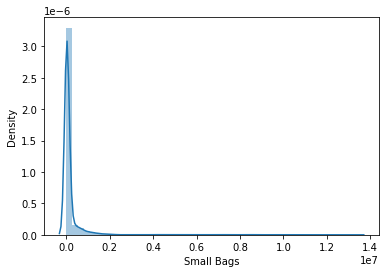

In [68]:
sns.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

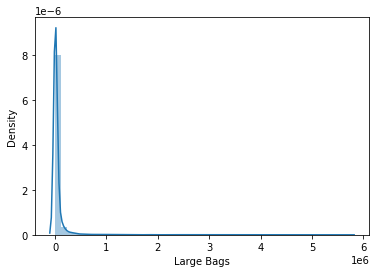

In [70]:
sns.distplot(df['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

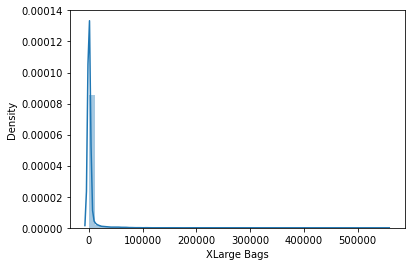

In [71]:
sns.distplot(df['XLarge Bags'])

<AxesSubplot:xlabel='year', ylabel='Density'>

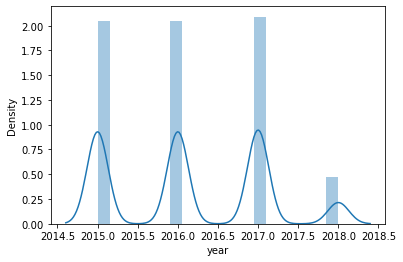

In [73]:
sns.distplot(df['year'])

<AxesSubplot:xlabel='Month', ylabel='Density'>

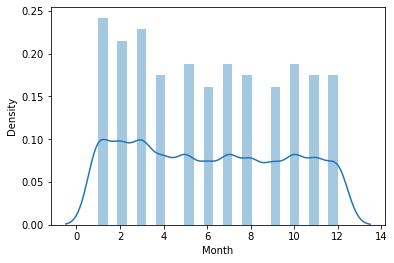

In [74]:
sns.distplot(df['Month'])

<AxesSubplot:xlabel='Day', ylabel='Density'>

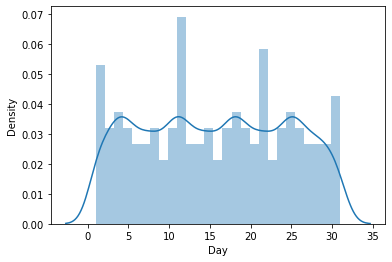

In [76]:
sns.distplot(df['Day'])

In [14]:
corr=df.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

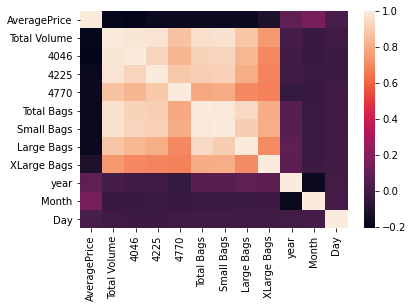

In [78]:
sns.heatmap(corr)

In [ ]:
The Dark shades shows highly negative corelation and light shades shows positive correlation.

<AxesSubplot:>

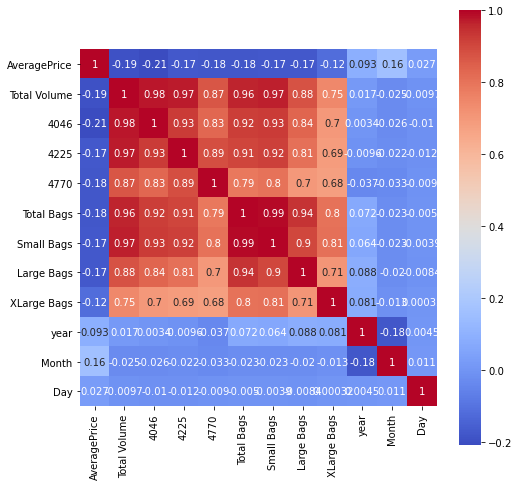

In [82]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap='coolwarm',annot=True,square=True)

# Plotting outliers:

<AxesSubplot:>

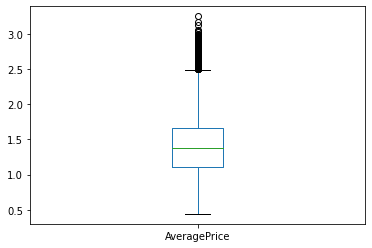

In [15]:
df['AveragePrice'].plot.box()

<AxesSubplot:>

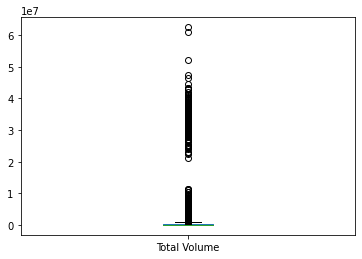

In [16]:
df['Total Volume'].plot.box()

<AxesSubplot:>

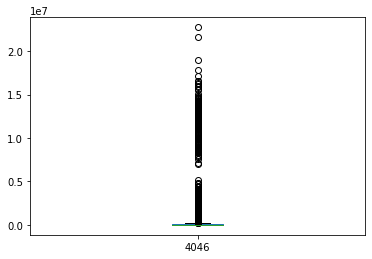

In [85]:
df['4046'].plot.box()

<AxesSubplot:>

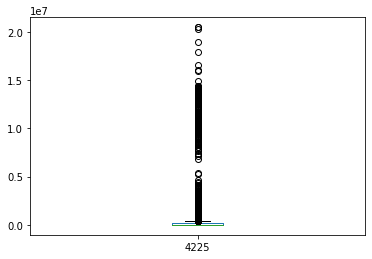

In [86]:
df['4225'].plot.box()

<AxesSubplot:>

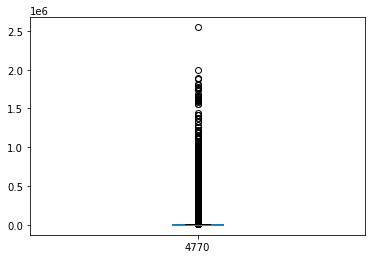

In [87]:
df['4770'].plot.box()

<AxesSubplot:>

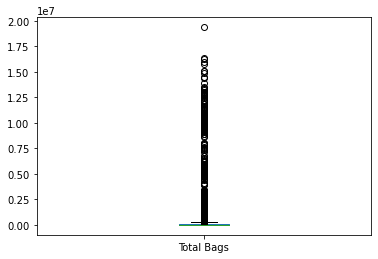

In [88]:
df['Total Bags'].plot.box()

<AxesSubplot:>

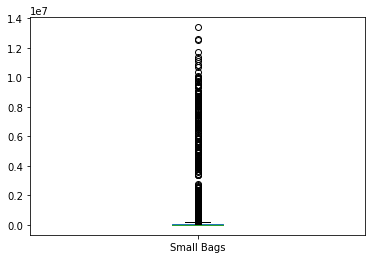

In [89]:
df['Small Bags'].plot.box()

<AxesSubplot:>

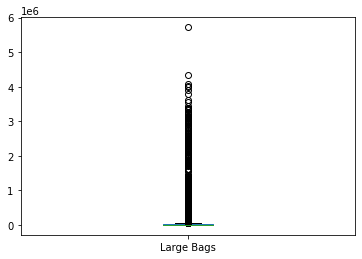

In [90]:
df['Large Bags'].plot.box()

<AxesSubplot:>

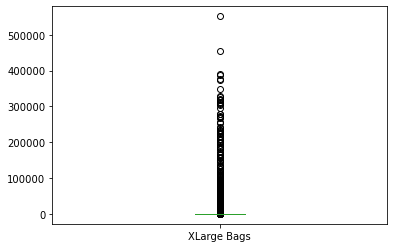

In [91]:
df['XLarge Bags'].plot.box()

<AxesSubplot:>

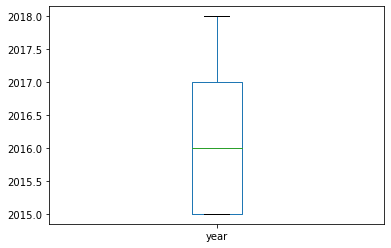

In [92]:
df['year'].plot.box()

<AxesSubplot:>

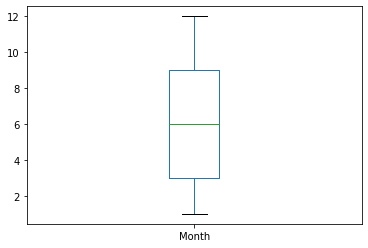

In [94]:
df['Month'].plot.box()

<AxesSubplot:>

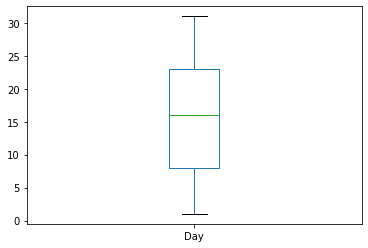

In [95]:
df['Day'].plot.box()

# Removing Outliers:

In [17]:
z=np.abs(zscore(df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','Month','Day']]))
z.shape

(18249, 12)

In [18]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [19]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(17651, 15)

# loss percent:

In [20]:
LP=(18249-17651)/18249*100
LP

3.276891884486821

# Feature Engineering:

In [21]:
df['region'].nunique()

54

In [22]:
df['type'].nunique()

2

In [23]:
df1=pd.get_dummies(df_new.drop(['region','Date'],axis=1),drop_first=True)

In [24]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [25]:
df1.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [160]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
Month             int64
Day               int64
dtype: object

In [161]:
scaledX

array([[-0.18868864, -0.22771641, -0.23081597, ..., -1.22128204,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -1.22128204,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -1.22128204,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.97050371,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.97050371,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.97050371,
        -1.46495942, -0.98707516]])

# PCA:

In [162]:
from sklearn.decomposition import PCA
testpca=PCA()
Y=testpca.fit(scaled)

In [163]:
Y.explained_variance_ratio_

array([0.56393658, 0.09436435, 0.07857143, 0.0752064 , 0.04874218,
       0.04044599, 0.03471262, 0.01992903, 0.01717085, 0.01447562,
       0.01029285, 0.00140755, 0.00074454])

In [164]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 56.39365785,  65.83009306,  73.68723647,  81.20787609,
        86.08209374,  90.12669318,  93.59795523,  95.59085868,
        97.3079434 ,  98.75550571,  99.78479105,  99.9255461 ,
       100.        ])

In [165]:
k=np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 10


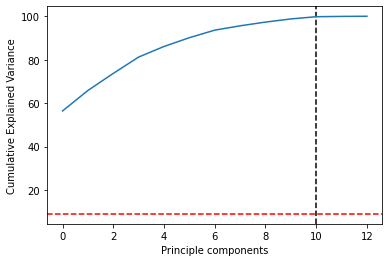

In [166]:
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")
plt.plot(var_cumu)
plt.show()

# Data visualisation Variance:

In [198]:
df=pd.get_dummies(df)
dummy_df=df.copy()

<AxesSubplot:>

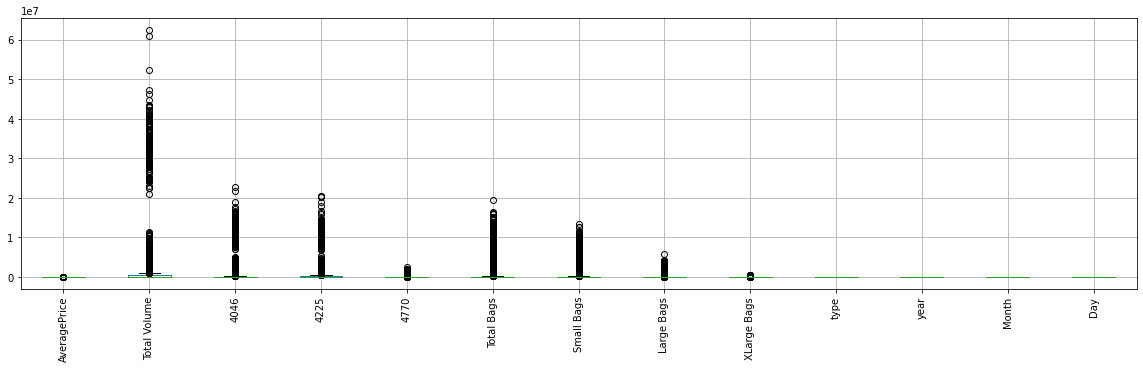

In [199]:
df.boxplot(rot=90, figsize=(20,5))

In [200]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

# Splitting the data:

In [27]:
x=df1.drop('AveragePrice',axis=1)
y=df1['AveragePrice']

# Removing skewness:

In [28]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[-0.07532391, -0.65742071,  0.35142978, ...,  1.49138301,
         1.22756521, -1.01904715],
       [-0.14749743, -0.77717852,  0.26951276, ...,  1.49138301,
         0.53822879, -1.01904715],
       [ 0.20555557, -0.7317763 ,  0.64933326, ...,  1.49138301,
        -0.21895878, -1.01904715],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ..., -1.64028838,
         0.64019459,  0.98130886],
       [-0.70179733, -0.54701087, -0.71637127, ..., -1.64028838,
        -0.10529902,  0.98130886],
       [-0.66738095, -0.35967077, -0.79165015, ..., -1.64028838,
        -0.9581001 ,  0.98130886]])

Applying train_test_split:

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

# Regression models:

# 1.Linear Regression:

In [30]:
#from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [31]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.2264090079193323
Mean squared error: 0.08367695113155313
Root mean squared error: 0.2892696858150766


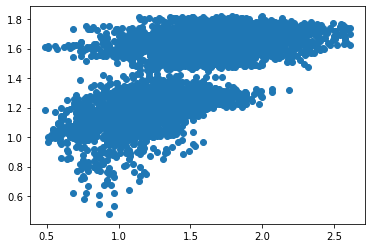

In [33]:
plt.scatter(x=y_test,y=pred)

# 2.Decision Tree Regressor:

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [35]:
dt_accuracy = round(dt.score(x_test,y_test)*100,2)
print(dt_accuracy,"%")

67.99 %


Text(0, 0.5, 'Predicted Y')

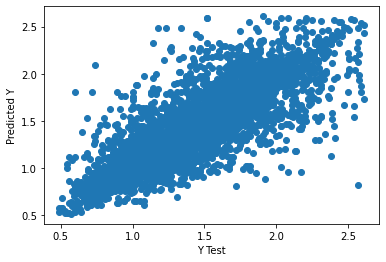

In [36]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [37]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.1426334763948498
Mean squared error: 0.047620909871244635
Root mean squared error: 0.21822215715010387


# 3.GradientBoostRegressor:

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr.fit(x_test, y_test)

GradientBoostingRegressor()

In [40]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)


gbr.score(x_train, y_train)*100

70.91720472895307

In [41]:
gbr.score(x_test, y_test)*100

74.7681705515383

# 4.RandomForestRegressor:

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [43]:
rf.score(x_test,y_test)*100

85.81161946112748

In [44]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.1020266094420601
Mean squared error: 0.02110616440858369
Root mean squared error: 0.1452796076831972


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

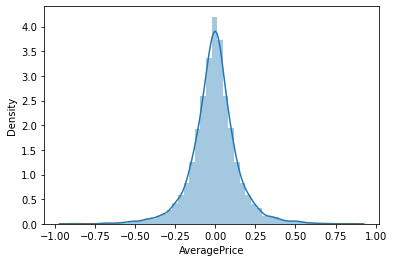

In [45]:
sns.distplot((y_test-pred),bins=50)

,Y-test,Pred
3596,1.36,1.3639
7141,1.70,1.6390
4625,1.22,1.1516
5456,0.81,0.8577
10969,1.85,1.8133


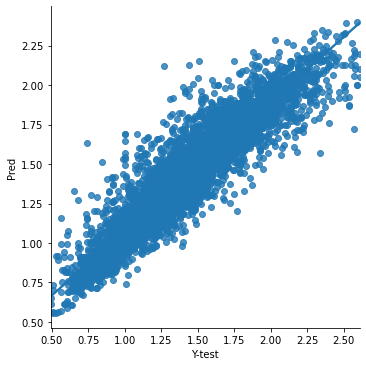

In [46]:
data=pd.DataFrame({'Y-test':y_test,'Pred':pred},columns=['Y-test','Pred'])
sns.lmplot(x='Y-test',y='Pred',data=data,palette='rainbow')
data.head()

# Cross validation score:

In [47]:
print(cross_val_score(lr,x,y,cv=5).mean()*100)

-3004.921708823697


In [48]:
print(cross_val_score(dt,x,y,cv=5).mean()*100)

-27.461146936292803


In [49]:
print(cross_val_score(gbr,x,y,cv=5).mean()*100)

34.62585803087638


In [50]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

21.986193310485696


# Hyper parameter tuning:

In [52]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters={"bootstrap":[True],
           "n_estimators":[10,20],
           "max_depth":[5,6],
           "max_features":['auto','sqrt'],
           "criterion":['poisson','absolute_error']}
grid=GridSearchCV(estimator=rf, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'criterion': ['poisson', 'absolute_error'],
                         'max_depth': [5, 6], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20]})

In [56]:
best_parameters=grid.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'poisson', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 10}


In [59]:
clf=RandomForestRegressor(bootstrap=True,criterion='poisson',max_depth=6,max_features='sqrt',n_estimators=10)
clf.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=6, max_features='sqrt',
                      n_estimators=10)

# Evaluating the model:

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((rf.score(x_test,y_test)*100))

85.62406167266107


# Saving the best model:

In [62]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [65]:
dataframe=pd.DataFrame({})
preds=rf.predict(x_test)
dataframe['Predicted AveragePrice']=preds
dataframe['Actual AveragePrice']=y_test.values
dataframe[0:10]

,Predicted AveragePrice,Actual AveragePrice
0,1.3315,1.36
1,1.6190,1.70
2,1.1640,1.22
3,0.8591,0.81
4,1.8293,1.85
5,1.0535,1.10
6,1.0828,1.11
7,1.6032,1.65
8,1.3631,1.43
9,1.8625,1.82


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve

In [3]:
df=pd.read_csv("avacado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


As we have already analysed the data in both graphical and non-graphical way.we will visualize the bivariate analysis again with target column region.

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [6]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

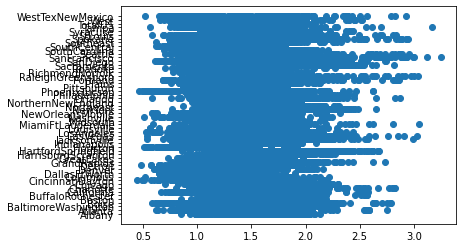

In [72]:
plt.scatter(df['AveragePrice'],df['region'])

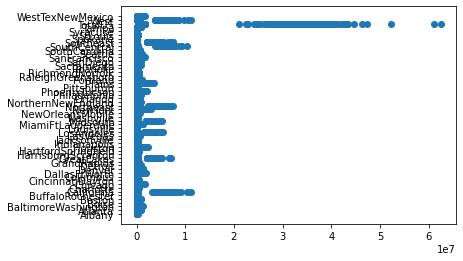

In [73]:
plt.scatter(df['Total Volume'],df['region'])

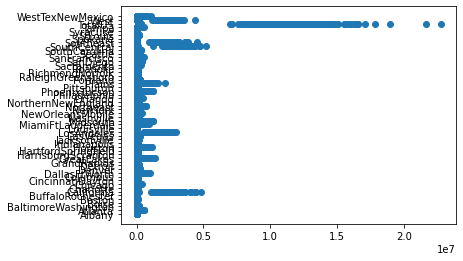

In [74]:
plt.scatter(df['4046'],df['region'])

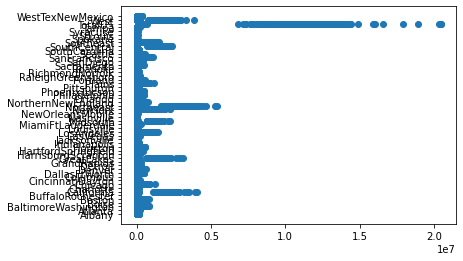

In [75]:
plt.scatter(df['4225'],df['region'])

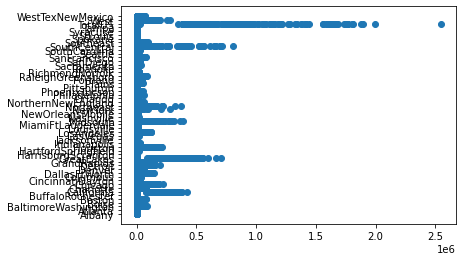

In [76]:
plt.scatter(df['4770'],df['region'])

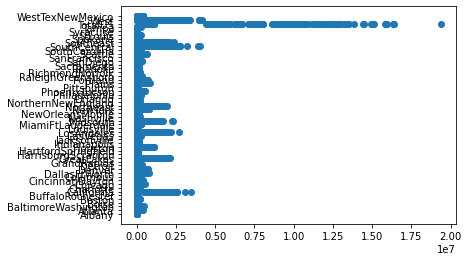

In [77]:
plt.scatter(df['Total Bags'],df['region'])

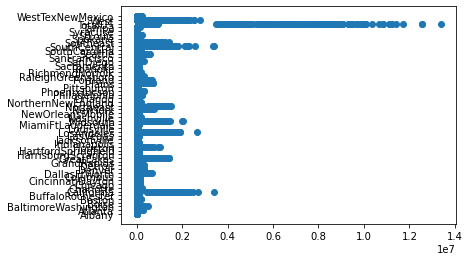

In [78]:
plt.scatter(df['Small Bags'],df['region'])

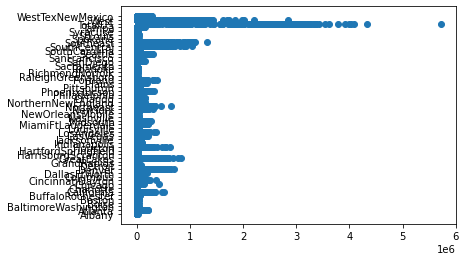

In [79]:
plt.scatter(df['Large Bags'],df['region'])

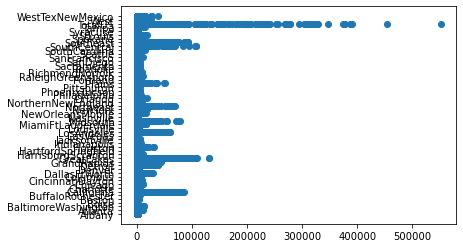

In [80]:
plt.scatter(df['XLarge Bags'],df['region'])

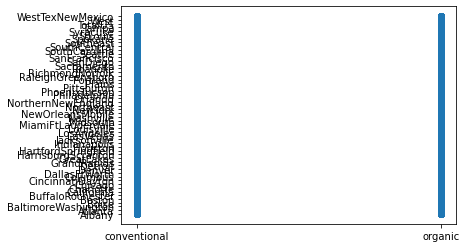

In [81]:
plt.scatter(df['type'],df['region'])

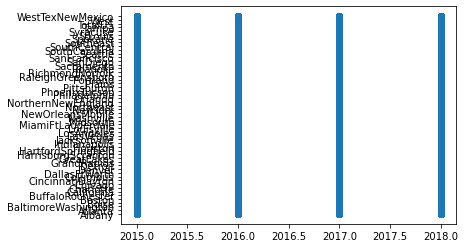

In [82]:
plt.scatter(df['year'],df['region'])

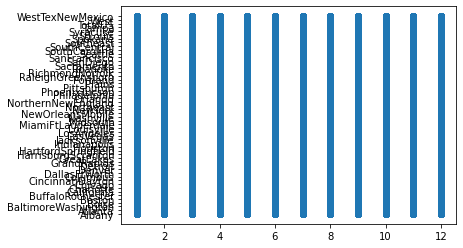

In [83]:
plt.scatter(df['Month'],df['region'])

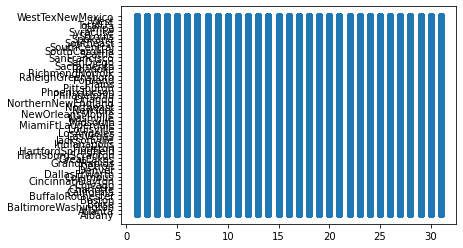

In [84]:
plt.scatter(df['Day'],df['region'])

In [7]:
z=np.abs(zscore(df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','Month','Day']]))
z.shape

(18249, 12)

In [8]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [9]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(17651, 15)

In [10]:
df1=pd.get_dummies(df_new['type'])

In [11]:
data=[df_new,df1]
final_df=pd.concat(data,axis=1)

In [12]:
final_df.drop('type',axis=1,inplace=True)
final_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,conventional,organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,1,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,1,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,1,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,1,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,1,0


In [13]:
df=final_df

In [14]:
Le=LabelEncoder()
df['region']=Le.fit_transform(df['region'])
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [15]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       52, 53, 51])

In [16]:
df['region'].nunique()

54

Thus we have converted all our categorical data into numeric type.

In [17]:
df.drop('Date',axis=1,inplace=True)

In [18]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,conventional,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20,1,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [20]:
scaledX

array([[-0.19535234, -0.3920086 , -0.34945151, ...,  1.28930873,
         1.01904715, -1.01904715],
       [-0.1435096 , -0.40125088, -0.3502761 , ...,  0.49165249,
         1.01904715, -1.01904715],
       [-1.2322071 , -0.33870193, -0.35000214, ..., -0.30600376,
         1.01904715, -1.01904715],
       ...,
       [ 1.20440158, -0.44184559, -0.34909848, ...,  0.60560338,
        -0.98130886,  0.98130886],
       [ 1.35992979, -0.43943771, -0.34833475, ..., -0.19205286,
        -0.98130886,  0.98130886],
       [ 0.55636736, -0.43816945, -0.34522454, ..., -0.98970911,
        -0.98130886,  0.98130886]])

In [21]:
x=df.drop('region',axis=1)
y=df['region']

In [22]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[-0.11782446, -0.07532391, -0.65742071, ...,  1.22756521,
         1.01904715, -1.01904715],
       [-0.06432986, -0.14749743, -0.77717852, ...,  0.53822879,
         1.01904715, -1.01904715],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -0.21895878,
         1.01904715, -1.01904715],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ...,  0.64019459,
        -0.98130886,  0.98130886],
       [ 1.31329624, -0.70179733, -0.54701087, ..., -0.10529902,
        -0.98130886,  0.98130886],
       [ 0.61561867, -0.66738095, -0.35967077, ..., -0.9581001 ,
        -0.98130886,  0.98130886]])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [24]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

76.96137339055794 at random_state 0
77.93991416309012 at random_state 1
76.7725321888412 at random_state 2
78.28326180257511 at random_state 3
78.62660944206009 at random_state 4
77.80257510729614 at random_state 5
79.1587982832618 at random_state 6
78.43776824034336 at random_state 7
77.95708154506438 at random_state 8
78.19742489270386 at random_state 9
77.04721030042919 at random_state 10
78.84978540772532 at random_state 11
77.81974248927038 at random_state 12
78.55793991416309 at random_state 13
77.87124463519314 at random_state 14
78.57510729613733 at random_state 15
77.59656652360515 at random_state 16
77.71673819742489 at random_state 17
79.43347639484979 at random_state 18
77.59656652360515 at random_state 19
78.86695278969957 at random_state 20
77.08154506437769 at random_state 21
78.4892703862661 at random_state 22
77.95708154506438 at random_state 23
78.14592274678111 at random_state 24
77.87124463519314 at random_state 25
78.11158798283262 at random_state 26
78.42060085836

In [136]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=193)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)

Best accuracy is 0.8051359516616314  on Random_state 1


In [137]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy Of Decision Tree Classifier is:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.81      0.81      0.81       110
           1       0.76      0.65      0.70       108
           2       0.96      0.93      0.94        96
           3       0.77      0.73      0.75        98
           4       0.88      0.90      0.89       115
           5       0.64      0.74      0.69       101
           6       0.92      0.96      0.94        82
           7       0.82      0.83      0.82       110
           8       0.89      0.94      0.92        98
           9       0.91      0.86      0.89        96
          10       0.70      0.67      0.68       105
          11       0.86      0.85      0.86       102
          12       0.86      0.76      0.80        90
          13       0.77      0.81      0.79       113
          14       0.81      0.81      0.81        99
          15       0.94      0.86      0.90        70
          16       0.80      0.88      0.84        9

In [140]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue=0
best_score=0
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test)>best_score:
        best_score=knn.score(x_train,y_train)
        best_Kvalue=i
    print("Best KNN value:{}".format(best_Kvalue))
    print("Test Accuracy:{}".format(round(best_score*100,2)))

Best KNN value:1
Test Accuracy:100.0
Best KNN value:1
Test Accuracy:100.0
Best KNN value:1
Test Accuracy:100.0
Best KNN value:1
Test Accuracy:100.0
Best KNN value:1
Test Accuracy:100.0
Best KNN value:1
Test Accuracy:100.0
Best KNN value:1
Test Accuracy:100.0
Best KNN value:1
Test Accuracy:100.0
Best KNN value:1
Test Accuracy:100.0


In [141]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print("KNN Classifier:\n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy of KNeighbors Classifier is:{}%".format(round(knn.score(x_test,y_test)*100,2)))

KNN Classifier:

               precision    recall  f1-score   support

           0       0.57      0.81      0.67       110
           1       0.64      0.54      0.59       108
           2       0.71      0.70      0.71        96
           3       0.66      0.74      0.70        98
           4       0.69      0.74      0.71       115
           5       0.52      0.50      0.51       101
           6       0.78      0.78      0.78        82
           7       0.63      0.70      0.66       110
           8       0.83      0.84      0.83        98
           9       0.60      0.77      0.67        96
          10       0.48      0.55      0.52       105
          11       0.63      0.74      0.68       102
          12       0.77      0.60      0.68        90
          13       0.73      0.61      0.66       113
          14       0.69      0.69      0.69        99
          15       0.64      0.60      0.62        70
          16       0.54      0.55      0.55        96
         

In [25]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.91      0.94      0.93       123
           1       0.83      0.92      0.87       109
           2       0.96      0.98      0.97       111
           3       0.88      0.84      0.86       108
           4       0.95      0.98      0.96       110
           5       0.90      0.85      0.87       106
           6       0.97      0.98      0.97        92
           7       0.94      0.92      0.93       114
           8       0.96      0.99      0.98       120
           9       0.94      0.88      0.91       125
          10       0.83      0.83      0.83       104
          11       0.96      0.96      0.96       116
          12       0.94      0.94      0.94       112
          13       0.88      0.84      0.86       112
          14       0.91      0.92      0.92       115
          15       0.96      0.98      0.97        93
          16       0.98      0.94      0.96       1

In [154]:
print(cross_val_score(dt,x,y,cv=10).mean()*100)

63.02741426825238


In [155]:
print(cross_val_score(knn,x,y,cv=10).mean()*100)

49.53183359587293


In [26]:
print(cross_val_score(rf,x,y,cv=10).mean()*100)

76.46546828831661


# Hyper parameter tuning:

In [27]:
from sklearn.model_selection import GridSearchCV
parameters={'bootstrap':[True],
            'max_depth':[5,6],
            'max_features':['auto','sqrt'],
            'n_estimators':[10,20],
            'criterion':['gini','entropy']}
            
grid=GridSearchCV(estimator=rf, param_grid=parameters,cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20]})

In [28]:
best_parameters=grid.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 20}


In [ ]:
(grid.best_score_)*100

In [29]:
clf=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=6,max_features='auto',n_estimators=20)
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=20)

In [30]:
clf.score(x_test,y_test)*100

65.7510729613734

# AUC_ROC Curve:

In [31]:
from sklearn.metrics import roc_curve,roc_auc_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0. , 0.1, 0. , ..., 0. , 0. , 0. ])

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions=cross_val_predict(clf,x_train,y_train,cv=5)
confusion_matrix(y_train,predictions)

array([[169,   0,   0, ...,   0,   0,   0],
       [  0, 112,   0, ...,   0,   0,   1],
       [  0,   0, 189, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 113,   0,   0],
       [  0,   0,   0, ...,   1, 148,   0],
       [  0,   4,  16, ...,   0,   0, 100]], dtype=int64)

In [38]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train,predictions,average='micro'))
print("Recall:",recall_score(y_train,predictions,average='micro'))

Precision: 0.661001183832234
Recall: 0.661001183832234


In [40]:
from sklearn.metrics import f1_score
f1_score(y_train,predictions,average='micro')

0.661001183832234

# Evaluate the model:

In [51]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((rf.score(x_test,y_test)*100))

90.12875536480686


# Saving the best model:

In [52]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [54]:
result=pd.DataFrame({})
preds=rf.predict(x_test)
result['Predicted region']=preds
result['Actual region']=y_test.values
result

,Predicted region,Actual region
0,25,25
1,48,47
2,5,5
3,12,12
4,36,36
...,...,...
5820,10,10
5821,53,53
5822,6,6
5823,18,18


Thus our data is balanced most classification models hit the accuracy of 90% for this dataset.